In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+3.+np.random.normal(0,10.,size=100)

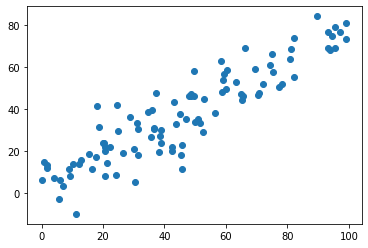

In [7]:
plt.scatter(X[:,0],X[:,1])

### demean

In [11]:
def demean(X):
    return X-np.mean(X,axis=0)

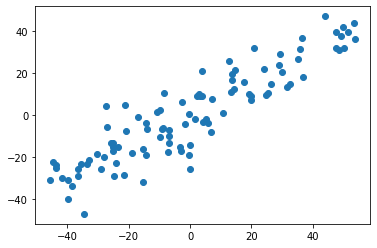

In [14]:
X_demean=demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])

### 梯度上升法

In [15]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [16]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [17]:
def df_debug(w,X,epsilon=0.0001):
    res=np.empty(len(w))
    for i in range(len(w)):
        w_1=w.copy()
        w_1[i]+=epsilon
        w_2=w.copy()
        w_2[i]-=epsilon
        res[i]=(f(w_1,X)-f(w_2,X))/(2*epsilon)

In [45]:
def direction(w):
    return w/np.linalg.norm(w) #求模
def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w=direction(initial_w)
    cur_iter=0
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        print(w)
        w=w + eta * gradient
        w=direction(w) # 注意：每次求一个单位方向
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter+=1
    return w
        

In [46]:
initial_w=np.random.random(X.shape[1]) #注意：不能从0向量开始
initial_w

array([0.34564239, 0.5282805 ])

In [47]:
eta=0.001

In [48]:
# 注意：不能用standardScaler标准化数据，因为标准化后方差就为一了

In [49]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

[0.54750257 0.836804  ]


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

### scikitlearn中的PCA

In [51]:
from sklearn.decomposition import PCA

In [53]:
pca=PCA(n_components=1)

In [54]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.components_

array([[0.7866733 , 0.61736951]])

In [56]:
X_reduction=pca.transform(X)

In [58]:
X_restore=pca.inverse_transform(X_reduction)

In [59]:
X_restore.shape

(100, 2)

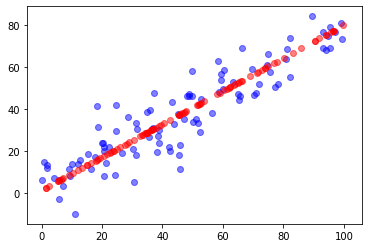

In [60]:
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.5)
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [62]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [65]:
X_train.shape

(1347, 64)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
knn_clf.score(X_test,y_test)

0.9866666666666667

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [71]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
X_train_reduction=pca.transform(X_train)

In [73]:
X_test_reduction=pca.transform(X_test)

In [74]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
knn_clf.score(X_test_reduction,y_test)

0.6066666666666667

In [76]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [79]:
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_


array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

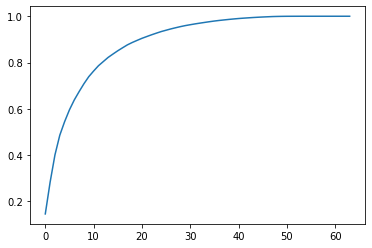

In [82]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [83]:
pca=PCA(0.95)

In [84]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
pca.n_components_

28

In [86]:
X_train_reducation=pca.transform(X_train)

In [92]:
X_test_reduction1=pca.transform(X_test)

In [93]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')